<a href="https://colab.research.google.com/github/AdibBENHLEL/AdibBENHLEL/blob/main/PROJECT_DEEP_LEARNING_CLASSIFICATION_CNN_HAPPY_SAD_IMAGES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Importation des bibliothèques et chargement de données**


In [25]:
import tensorflow as tf # creating, training, and deploying machine learning and deep learning models.
import cv2 # computer vision and image processing tasks.
import matplotlib.pyplot as plt # data visualization.
import imghdr #used to determine the type of image file.
import math
from google.colab import drive
import pandas as pd
import numpy as np

In [111]:
# Monter Google Drive dans Google Colab
drive.mount('/content/drive',force_remount=True)
# Définir le chemin vers les données dans Google Drive
data_dir = "/content/drive/MyDrive/ml/Project_DataBase/data"


Mounted at /content/drive


In [23]:
img_exts = ['jpeg','jpg','bmp','png']

In [24]:
# Parcourir chaque classe d'images dans le répertoire des données
for image_class in os.listdir(data_dir):
    # Parcourir chaque image dans le dossier de la classe d'images actuelle
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construire le chemin complet de l'image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Charger l'image à l'aide de cv2
            img = cv2.imread(image_path)
            # Déterminer le type de l'image (jpeg, png, etc.) à l'aide d'imghdr
            tip = imghdr.what(image_path)
            # Vérifier si l'extension de l'image est dans la liste autorisée
            if tip not in image_exts:
                print('Image non autorisée dans la liste des extensions : {}'.format(image_path))
                # Supprimer l'image si elle n'est pas dans la liste autorisée
                os.remove(image_path)
        except Exception as e:
            # Gérer les exceptions si un problème survient avec l'image
            print('Problème avec l\'image {}'.format(image_path))


Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/7-principles-of-successful-and-happy-people.png
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/1HEoLBLidT2u4mhJ0oiDgig.png
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/154006829.jpg
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/8cxKy5g9i.jpg
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/smile.woman_.jpg
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/11-Habits-of-Truly-Happy-People.jpg
Problème avec l'image /content/drive/MyDrive/ml/Project_DataBase/data/happy/1902539.jpg
Problème avec l'image /content/drive/MyDriv

In [34]:
# Charger le dataset à partir du répertoire
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",        # Les étiquettes sont déduites des noms de dossiers
    label_mode="int",         # Les étiquettes sont des entiers (par défaut : "int")
    batch_size=32,            # Taille des lots
    image_size=(256, 256),    # Dimensions des images redimensionnées
    shuffle=True,             # Mélanger les données
    seed=42                   # Assure la reproductibilité
)
# Explorer le dataset
for images, labels in dataset.take(1):  # Prendre un lot pour exploration
    print(f"Taille des images : {images.shape}")
    print(f"Labels : {labels}")

Found 305 files belonging to 2 classes.
Taille des images : (32, 256, 256, 3)
Labels : [0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1]


In [36]:
# Fetching another batch from the iterator
data_iterator = dataset.as_numpy_iterator()# is used in TensorFlow to convert a tf.data.Dataset object into a Python iterator that yields batches of data as NumPy arrays.

In [37]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7a6babe08ac0>)

In [40]:
batch = data_iterator.next() #Cette méthode permet de récupérer le prochain lot de données à partir de l'itérateur.

In [41]:
# Obtenir la forme (shape) du lot d'images dans le batch
batch[0].shape

(32, 256, 256, 3)

In [49]:
# class 1 : Sad People
# class 0 : Happy People
# Affichage du premier lot des étiquettes (labels)
print(batch[1])
#batch[0] contient un tableau de toutes les images du lot, sous forme de tenseurs.

[0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1]


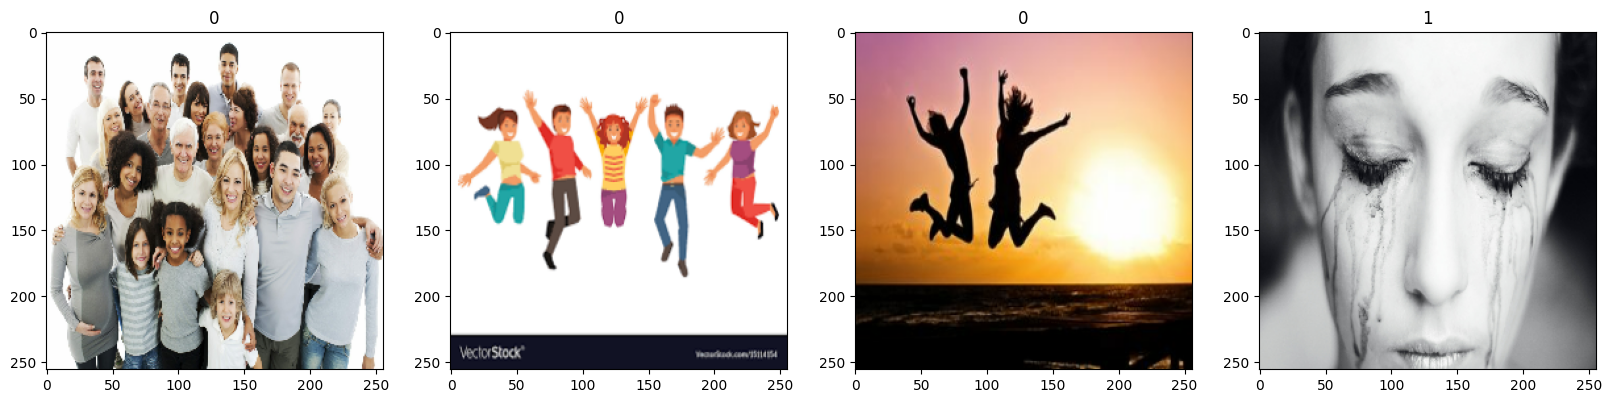

In [50]:
# Création d'une figure avec 4 sous-graphiques (axes), disposés en une seule ligne
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Boucle sur les 4 premières images du lot
for idx, img in enumerate(batch[0][:4]):
    # Affichage de l'image en utilisant imshow
    ax[idx].imshow(img.astype(int))  # Convertit l'image en entier pour un affichage correct
    # Ajout du titre à chaque sous-graphique avec l'étiquette correspondante à l'image
    ax[idx].title.set_text(batch[1][idx])  # batch[1][idx] contient l'étiquette de l'image (0 ou 1)


## **Pré-traitement des données (Data Pre-Processing)**

In [55]:
dataset = dataset.map(lambda x,y: (x/255,y))
# Récupérer un lot d'images pour tester
for images, labels in dataset.take(1):  # Take one batch
    print("Images normalisées (premiers 3 pixels) :", images[0, :3, :3, 0])  # Afficher les premiers pixels de la première image
    print("Etiquettes :", labels.numpy())  # Afficher les labels du lot
'''
normalise toutes les images du dataset en les divisant par 255 pour que leurs valeurs soient comprises entre 0 et 1,
tout en conservant intactes les étiquettes associées à ces images.
Cela aide à améliorer la convergence et la stabilité de l'entraînement du modèle de deep learning.

x représente l'image (un tenseur de pixels).
y représente l'étiquette ou le label (la classe à laquelle l'image appartient).

'''

Images normalisées (premiers 3 pixels) : tf.Tensor(
[[4.0205754e-09 4.0205754e-09 4.0676915e-09]
 [4.0205754e-09 4.0205754e-09 4.0676915e-09]
 [4.0205754e-09 4.0205754e-09 4.0676915e-09]], shape=(3, 3), dtype=float32)
Etiquettes : [1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]


"\nnormalise toutes les images du dataset en les divisant par 255 pour que leurs valeurs soient comprises entre 0 et 1,\ntout en conservant intactes les étiquettes associées à ces images.\nCela aide à améliorer la convergence et la stabilité de l'entraînement du modèle de deep learning.\n\nx représente l'image (un tenseur de pixels).\ny représente l'étiquette ou le label (la classe à laquelle l'image appartient).\n\n"

In [64]:
scaled_iterator = dataset.as_numpy_iterator()

In [65]:
batch = scaled_iterator.next()

In [69]:
# batch[0] représente un lot d'images (un tenseur contenant plusieurs images).
# La méthode min() permet de récupérer la valeur minimale parmi tous les pixels de ce lot d'images.
# Cela nous donne la valeur du pixel la plus faible dans l'ensemble du lot.
# Cette valeur peut être utile pour vérifier les données ou pour diagnostiquer d'éventuels problèmes de prétraitement des images.
batch[0].min()


0.0

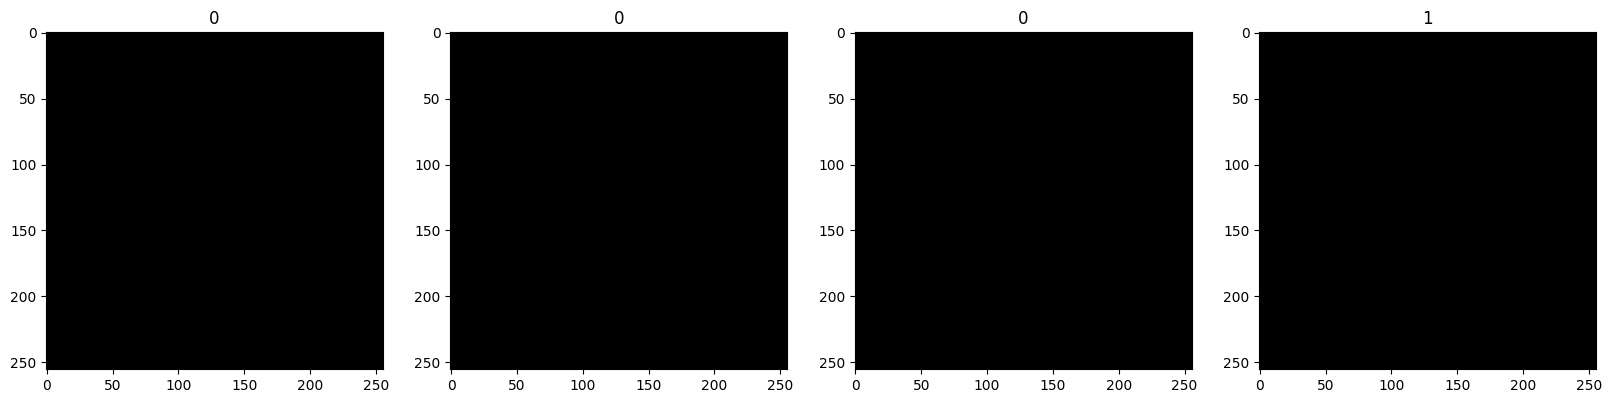

In [70]:
# Création d'une figure avec 4 sous-graphiques (axes), disposés en une seule ligne
# La taille de la figure est définie à 20x20 pouces
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Boucle sur les 4 premières images du lot (batch[0]) et leurs indices
# batch[0][:4] sélectionne les 4 premières images du lot
for idx, img in enumerate(batch[0][:4]):
    # Affichage de l'image sur l'axe correspondant (ax[idx])
    # La fonction imshow() est utilisée pour afficher l'image dans chaque sous-graphe
    ax[idx].imshow(img)

    # Ajout d'un titre pour chaque sous-graphe,
    # qui correspond à l'étiquette de l'image dans batch[1] à l'index correspondant (batch[1][idx])
    ax[idx].title.set_text(batch[1][idx])  # Le titre est l'étiquette de l'image (0 ou 1)


# **Splitting the Data**

In [72]:
len(dataset)# 305/32=9.531 lot d'image

10

In [74]:
# Calcul de la taille de l'ensemble d'entraînement (70% du dataset total)
train_size = int(len(dataset) * 0.7)

# Calcul de la taille de l'ensemble de validation (20% du dataset total)
val_size = int(len(dataset) * 0.2)

# Calcul de la taille de l'ensemble de test (10% du dataset total)
test_size = int(len(dataset) * 0.1)


In [75]:
# On prend les 'train_size' premiers éléments du dataset 'data' pour l'entraînement
train = data.take(train_size)

# On saute les 'train_size' premiers éléments (utilisés pour l'entraînement),
# puis on prend les 'val_size' éléments suivants pour la validation
val = data.skip(train_size).take(val_size)

# On saute les 'train_size' éléments de l'entraînement et les 'val_size' éléments de la validation,
# puis on prend les 'test_size' éléments restants pour le test
test = data.skip(train_size + val_size).take(test_size)


# **Building Deep Learning Model**

In [76]:
# Importation de la classe Sequential depuis tensorflow.keras.models
# La classe Sequential permet de créer un modèle linéaire (unidimensionnel) où les couches sont empilées les unes après les autres.
from tensorflow.keras.models import Sequential

# Importation des couches nécessaires depuis tensorflow.keras.layers

# Conv2D est une couche de convolution 2D utilisée dans les réseaux de neurones convolutifs (CNN).
# Elle applique des filtres convolutifs pour extraire des caractéristiques des images (par exemple, des bords, textures, etc.).
from tensorflow.keras.layers import Conv2D

# MaxPooling2D est une couche de mise en sous-échantillonnage (pooling) utilisée après une couche de convolution.
# Elle réduit la taille spatiale des images tout en conservant les informations importantes.
# Cette opération aide à réduire le surapprentissage et à améliorer l'efficacité du modèle.
from tensorflow.keras.layers import MaxPooling2D

# Dense est une couche dense (fully connected) dans un réseau de neurones.
# Elle connecte chaque neurone de la couche précédente à chaque neurone de la couche actuelle.
# Ces couches sont couramment utilisées à la fin des réseaux de neurones pour effectuer la classification ou la régression.
from tensorflow.keras.layers import Dense

# Flatten est une couche qui aplatit les dimensions d'un tenseur en un vecteur une dimension.
# Elle est utilisée pour convertir les sorties des couches de convolution et de pooling en une forme compatible avec les couches entièrement connectées.
from tensorflow.keras.layers import Flatten

# Dropout est une couche utilisée pour la régularisation dans les réseaux de neurones.
# Elle permet de "désactiver" aléatoirement un certain pourcentage de neurones lors de l'entraînement, ce qui aide à réduire le surapprentissage (overfitting).
from tensorflow.keras.layers import Dropout


In [77]:
model = Sequential()

In [80]:
# Ajout de la première couche Conv2D avec 16 filtres de taille 3x3, un pas (stride) de 1, et une activation ReLU.
# La première couche nécessite une spécification de la forme d'entrée (input_shape) de l'image, ici (256, 256, 3),
# ce qui correspond à une image de taille 256x256 avec 3 canaux (RGB).
model.add(Conv2D(16, (3,3), 1 , activation='relu', input_shape = (256,256,3)))

# Ajout d'une couche de sous-échantillonnage (pooling) avec MaxPooling2D. Cela réduit la taille de l'image tout en
# gardant les caractéristiques les plus importantes (par exemple, réduire la dimension de l'image tout en
# conservant les informations de caractéristiques extraites par la convolution).
model.add(MaxPooling2D())

# Ajout d'une deuxième couche Conv2D avec 32 filtres de taille 3x3, un pas (stride) de 1, et une activation ReLU.
# Cette couche apprend plus de caractéristiques à un niveau plus élevé de l'image.
model.add(Conv2D(32, (3,3), 1 , activation='relu'))

# Ajout d'une autre couche de MaxPooling2D pour réduire la taille de l'image après la deuxième couche de convolution.
model.add(MaxPooling2D())

# Ajout d'une troisième couche Conv2D avec 16 filtres de taille 3x3, un pas (stride) de 1, et une activation ReLU.
# Cette couche est utilisée pour apprendre des caractéristiques à un niveau encore plus fin.
model.add(Conv2D(16, (3,3), 1 , activation='relu'))

# Une autre couche de MaxPooling2D pour réduire encore la taille de l'image.
model.add(MaxPooling2D())

# Ajout de la couche Flatten pour aplatir les sorties des couches de convolution en un vecteur unidimensionnel.
# Cette étape est nécessaire pour connecter la partie convolutive à la partie entièrement connectée du modèle.
model.add(Flatten())

# Ajout d'une couche Dense (couche entièrement connectée) avec 256 neurones et une activation ReLU.
# Cette couche prend l'output aplati des couches précédentes et apprend des relations complexes entre les caractéristiques extraites.
model.add(Dense(256, activation='relu'))

# Ajout de la couche de sortie Dense avec un seul neurone et une activation sigmoïde.
# La sortie est un nombre entre 0 et 1, qui est utilisé pour les problèmes de classification binaire (image de sad ou de happy).
model.add(Dense(1, activation='sigmoid'))


In [81]:
# Compilation du modèle en spécifiant l'optimiseur, la fonction de perte et les métriques
model.compile(
    'adam',  # L'optimiseur 'Adam' est utilisé ici. Il est largement utilisé pour l'entraînement des réseaux de neurones,
             # car il combine les avantages des optimisateurs SGD et RMSprop. Adam adapte le taux d'apprentissage pour chaque paramètre.

    loss=tf.losses.BinaryCrossentropy(),  # La fonction de perte choisie ici est la Binary Crossentropy. Elle est utilisée pour les problèmes de classification binaire.
                                         # Elle mesure la différence entre les prédictions du modèle et les véritables étiquettes (valeurs 0 ou 1).
                                         # Elle est particulièrement adaptée pour les tâches de classification binaire.

    metrics=['accuracy']  # La métrique choisie est l'accuracy (exactitude). Cela permet de suivre l'exactitude de la classification
                           # durant l'entraînement et l'évaluation du modèle, c'est-à-dire la proportion des prédictions correctes.
)


In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# **Training the model**

In [83]:
hist = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.5229 - loss: 517.2415 - val_accuracy: 0.5469 - val_loss: 3.3722
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4636 - loss: 7.3622 - val_accuracy: 0.5938 - val_loss: 1.0675
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5785 - loss: 1.1009 - val_accuracy: 0.6719 - val_loss: 0.5702
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7442 - loss: 0.4965 - val_accuracy: 0.7500 - val_loss: 0.4637
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8239 - loss: 0.4327 - val_accuracy: 0.8750 - val_loss: 0.3071
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8614 - loss: 0.3104 - val_accuracy: 0.9531 - val_loss: 0.1660
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9490 - loss: 0.1540 - val_accuracy: 0.9375 - val_loss: 0.1709
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9552 - loss: 0.1096 - val_accuracy: 0.9688 - val_loss: 0.0779
Epoch 

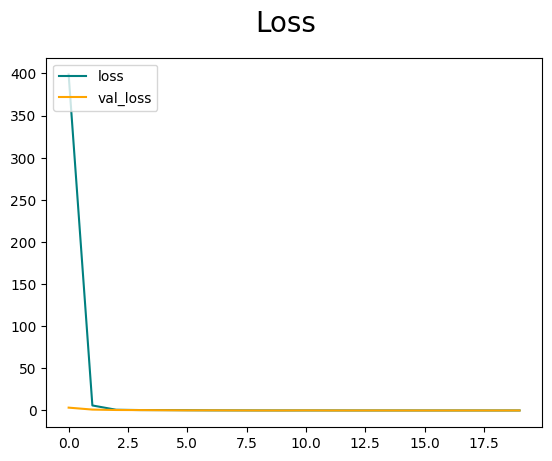

In [84]:
fig = plt.figure()  # Crée une nouvelle figure pour afficher les graphiques.
plt.plot(hist.history['loss'], color = 'teal', label='loss')  # Trace la courbe de la perte (loss) en utilisant la couleur teal.
plt.plot(hist.history['val_loss'], color='orange', label ='val_loss')  # Trace la courbe de la perte de validation (val_loss) en utilisant la couleur orange.
plt.suptitle('Loss', fontsize=20)  # Définit un titre principal pour le graphique avec une taille de police de 20.
plt.legend(loc='upper left')  # Affiche la légende en haut à gauche du graphique.
plt.show()  # Affiche le graphique avec les courbes de perte et de perte de validation.


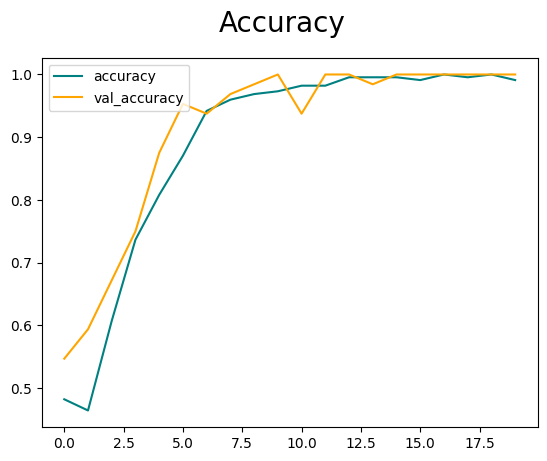

In [85]:
fig = plt.figure()  # Crée une nouvelle figure pour afficher les graphiques.
plt.plot(hist.history['accuracy'], color = 'teal', label='accuracy')  # Trace la courbe de précision (accuracy) en utilisant la couleur teal.
plt.plot(hist.history['val_accuracy'], color='orange', label ='val_accuracy')  # Trace la courbe de précision de validation (val_accuracy) en utilisant la couleur orange.
plt.suptitle('Accuracy', fontsize=20)  # Définit un titre principal pour le graphique avec une taille de police de 20.
plt.legend(loc='upper left')  # Affiche la légende en haut à gauche du graphique.
plt.show()  # Affiche le graphique avec les courbes de précision et de précision de validation.

# **Evaluation**

In [86]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  # Importe les métriques de précision, rappel et précision binaire pour l'évaluation du modèle.

In [87]:
pre = Precision()  # Crée un objet pour calculer la précision du modèle, c'est-à-dire la proportion des prédictions positives correctes.
re = Recall()  # Crée un objet pour calculer le rappel du modèle, c'est-à-dire la proportion des vraies valeurs positives correctement identifiées.
acc = BinaryAccuracy()  # Crée un objet pour calculer la précision binaire, c'est-à-dire la proportion des prédictions correctes pour un problème de classification binaire.

In [88]:
for batch in test.as_numpy_iterator():  # Itère sur les lots de données du jeu de test en utilisant un itérateur numpy.
    X, y = batch  # Assigne les images (X) et les étiquettes (y) à partir du lot actuel.
    yhat = model.predict(X)  # Prédit les étiquettes (yhat) pour les images X à l'aide du modèle.
    pre.update_state(y, yhat)  # Met à jour l'état de la métrique de précision en comparant les étiquettes réelles (y) et prédites (yhat).
    re.update_state(y, yhat)  # Met à jour l'état de la métrique de rappel en comparant les étiquettes réelles (y) et prédites (yhat).
    acc.update_state(y, yhat)  # Met à jour l'état de la précision binaire en comparant les étiquettes réelles (y) et prédites (yhat).

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


In [89]:
print(f'''
Precision: { pre.result().numpy()}
Recall: {re.result().numpy()}
Accuracy: {acc.result().numpy()}
 ''')


Precision: 1.0 
Recall: 1.0 
Accuracy: 1.0
 


# **Testing avec autre image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


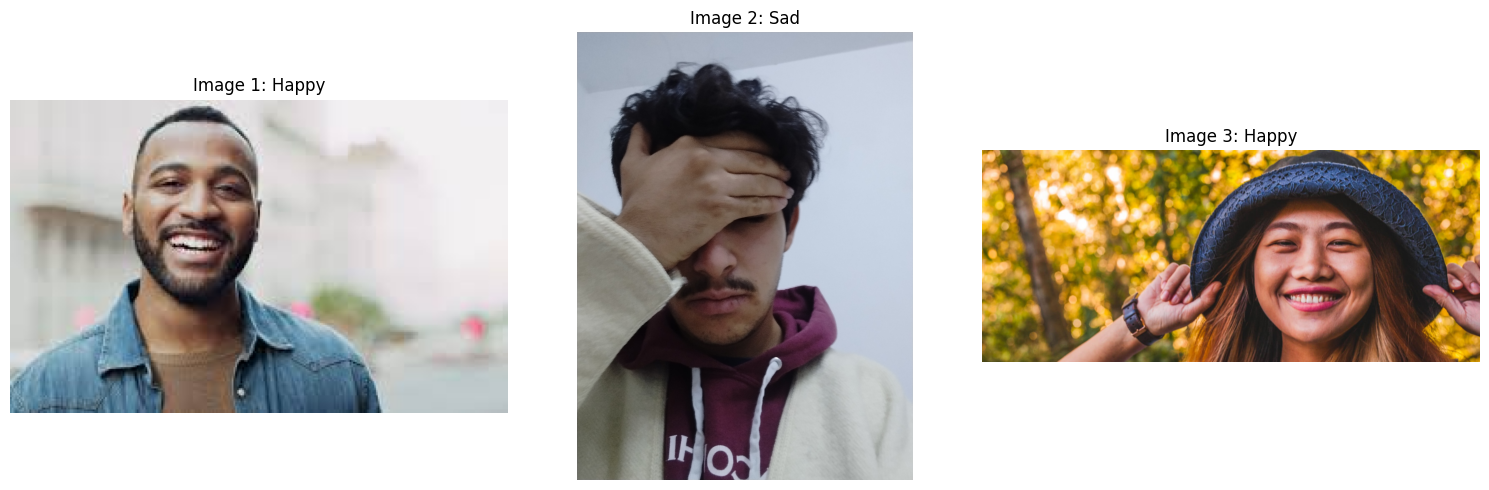

In [112]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np

# Chemins des images de test
data_test_dir = "/content/drive/MyDrive/ml/Project_DataBase/test_Images/ppp.jpeg"
data_test_dir1 = "/content/drive/MyDrive/ml/Project_DataBase/test_Images/h.jpg"
data_test_dir2 = "/content/drive/MyDrive/ml/Project_DataBase/test_Images/t.jpeg"

# Lire les images
img1 = cv2.imread(data_test_dir)
img2 = cv2.imread(data_test_dir1)
img3 = cv2.imread(data_test_dir2)

# Vérification si les images ont été chargées correctement
if img1 is None:
    print(f"Erreur de chargement de l'image: {data_test_dir}")
if img2 is None:
    print(f"Erreur de chargement de l'image: {data_test_dir1}")
if img3 is None:
    print(f"Erreur de chargement de l'image: {data_test_dir2}")

# Redimensionner les images
resize1 = tf.image.resize(img1, (256, 256)) if img1 is not None else None
resize2 = tf.image.resize(img2, (256, 256)) if img2 is not None else None
resize3 = tf.image.resize(img3, (256, 256)) if img3 is not None else None

# Normaliser les images en divisant par 255
resize1 = resize1 / 255.0 if resize1 is not None else None
resize2 = resize2 / 255.0 if resize2 is not None else None
resize3 = resize3 / 255.0 if resize3 is not None else None

# Fonction de prédiction pour afficher si la personne est triste ou heureuse
def predict_emotion(image):
    yhat = model.predict(np.expand_dims(image, axis=0))  # Ajouter une dimension pour correspondre au batch size
    if yhat > 0.5:
        return "Sad"
    else:
        return "Happy"

# Créer une figure avec une seule ligne de sous-graphiques
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 ligne, 3 colonnes

# Affichage des images et des prédictions
if img1 is not None:
    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convertir de BGR en RGB
    ax[0].set_title(f'Image 1: {predict_emotion(resize1)}')
    ax[0].axis('off')  # Désactiver l'axe pour un affichage plus propre

if img2 is not None:
    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # Convertir de BGR en RGB
    ax[1].set_title(f'Image 2: {predict_emotion(resize2)}')
    ax[1].axis('off')

if img3 is not None:
    ax[2].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))  # Convertir de BGR en RGB
    ax[2].set_title(f'Image 3: {predict_emotion(resize3)}')
    ax[2].axis('off')

# Afficher la figure
plt.tight_layout()
plt.show()
